# Handwritten Digits Classification

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

## Get Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


## EDA

In [3]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

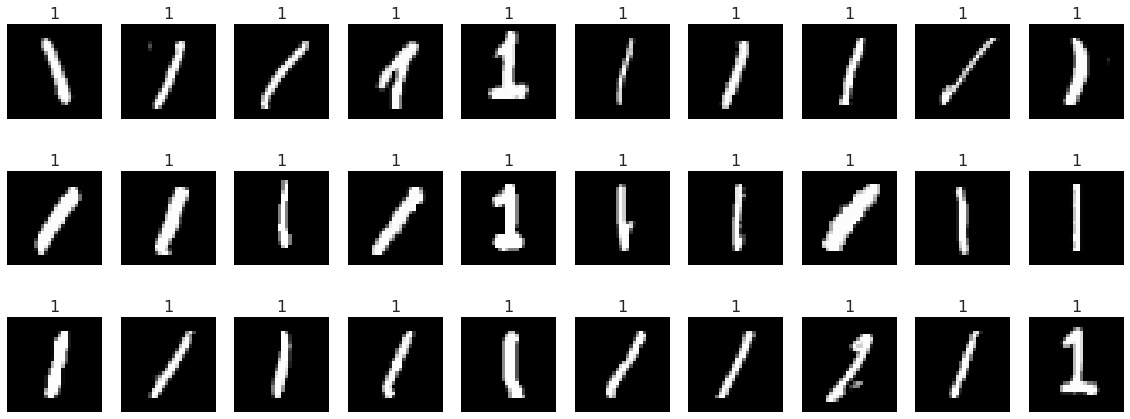

In [4]:
n_samples = 30
# images, labels = get_samples(n_samples, X_train, y_train)
images, labels = get_digit(1, n_samples, X_train, y_train)
plot_images(images, labels)

**Plot the barplot of number of images of each class (0 to 9)**

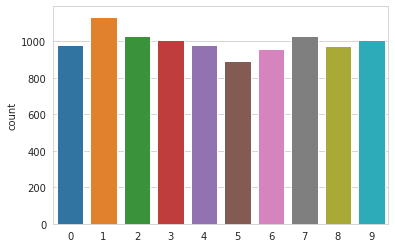

In [5]:
# Your code here
sns.countplot(y_test)

**Print out the range of pixel values (min, max)**

In [6]:
# Your code here
print('Pixel value range:', X_train.min(), X_train.max())

Pixel value range: 0 255


## Transform data for training

**Get the first `n_samples` images randomly from training set and test set. Then reshape them into long vectors**

In [7]:
n_samples = 1000
n_test_samples = 200
# Your code here
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

In [8]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (1000, 784)
Test data (200, 784)


In [9]:
# Get all the data
# Run it after you finish training with the 1000 samples
# X_train_flat = X_train.reshape((-1, 784))
# X_test_flat = X_test.reshape((-1, 784))
# y_train_flat = y_train
# y_test_flat = y_test

# print('Training data', X_train_flat.shape)
# print('Test data', X_test_flat.shape)
# print('Training label', y_train_flat.shape)
# print('Test label', y_test_flat.shape)

## Train models

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Train a SVM model**: Set up the training process and train with the small samples of data first before you take the full training dataset to train.

In [11]:
# Your code here
clf = SVC(kernel='linear')
clf.fit(X_train_flat, y_train_flat)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
parameters = {'gamma': [0.0001, 0.001, 0.01],
              'C':[0.01, 0.1, 1, 10, 100]}

model = SVC(kernel='rbf')

gridsearch_models = GridSearchCV(estimator=model,
                                 param_grid=parameters,
                                 scoring='accuracy',
                                 cv=5, n_jobs=-1)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
pd.DataFrame(gridsearch_models.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.394780,0.009042,0.213296,0.007233,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.140,0.140,0.140,0.140,0.135,0.139,0.002000,11
1,1.416430,0.007451,0.210135,0.001330,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.140,0.140,0.140,0.140,0.135,0.139,0.002000,11
2,1.442893,0.016363,0.216086,0.009372,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.140,0.140,0.140,0.140,0.135,0.139,0.002000,11
3,1.422161,0.014476,0.210652,0.001840,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.140,0.140,0.140,0.140,0.135,0.139,0.002000,11
4,1.419243,0.012761,0.218042,0.010284,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.140,0.140,0.140,0.140,0.135,0.139,0.002000,11
5,1.314748,0.009534,0.206005,0.002907,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.705,0.720,0.740,0.725,0.720,0.722,0.011225,9
6,1.410900,0.006344,0.211462,0.003831,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.145,0.150,0.140,0.140,0.135,0.142,0.005099,10
7,1.033816,0.027308,0.192276,0.004185,1,0.001,"{'C': 1, 'gamma': 0.001}",0.815,0.795,0.805,0.800,0.795,0.802,0.007483,8
8,0.705093,0.008762,0.160254,0.002088,1,0.01,"{'C': 1, 'gamma': 0.01}",0.920,0.930,0.920,0.875,0.905,0.910,0.019235,3
9,0.992786,0.006685,0.188095,0.002798,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.820,0.795,0.815,0.810,0.795,0.807,0.010296,7


In [14]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'gamma': 0.01}
Best score 0.916


In [15]:
best_model = gridsearch_models.best_estimator_